In [244]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import datetime
import pytz

# Load JSON data from file
with open('jams-processed.json') as f:
    data = json.load(f)
    
# Flatten the filtered JSON data into a pandas dataframe
    df = pd.json_normalize(data)

In [245]:
df.shape
#Shows 58303 rows / 17 columns

(58303, 17)

In [246]:
df.columns

Index(['delay', 'pubMillis', 'line', 'roadType', 'level', 'endNode', 'speed',
       'city', 'country', 'street', 'length', 'turnType', 'type', 'uuid',
       'request_time', 'blockingAlertUuid', 'startNode'],
      dtype='object')

In [247]:
df.head()

,delay,pubMillis,line,roadType,level,endNode,speed,city,country,street,length,turnType,type,uuid,request_time,blockingAlertUuid,startNode
0,99,1499556154925,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1,3,9th Ave,1.433333,Taguig,RP,Lane O,200,NONE,NONE,1213296112,1499556159,NaN,NaN
1,98,1499556154925,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1,3,9th Ave,1.447222,Taguig,RP,Lane O,200,NONE,NONE,1213296112,1499556279,NaN,NaN
2,97,1499556154925,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1,3,9th Ave,1.455556,Taguig,RP,Lane O,200,NONE,NONE,1213296112,1499556400,NaN,NaN
3,95,1499556154925,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1,3,9th Ave,1.475000,Taguig,RP,Lane O,200,NONE,NONE,1213296112,1499556520,NaN,NaN
4,87,1499763636955,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",1,3,9th Ave,1.563889,Taguig,RP,Lane O,200,NONE,NONE,1415492894,1499764339,NaN,NaN


In [248]:
# Keep only relevant columns
df = df[['delay', 
         'pubMillis', 
         'line', 
         #'roadType',
         'level',
         'endNode',
         'speed',
         #'city', 'country',
         'street',
         #'length', 'turnType',
         'type',
         #'uuid',
         #'request_time', 'blockingAlertUuid',
         'startNode']].copy()

In [249]:
# convert the pubMillis column to datetime data type
df['pubMillis'] = pd.to_datetime(df['pubMillis'], unit='ms')

# localize datetime to UTC timezone
df['pubMillis'] = df['pubMillis'].dt.tz_localize('UTC')

# convert datetime to GMT+8:00 timezone
df['pubMillis'] = df['pubMillis'].dt.tz_convert(pytz.timezone('Asia/Singapore'))

#Set DateTime as Index
df = df.set_index('pubMillis')

In [250]:
print('Missing Values:\n', df.isnull().sum())

Missing Values:
 delay            0
line             0
level            0
endNode       4582
speed            0
street          36
type             0
startNode    55897
dtype: int64


In [261]:
df.head()

,delay,line,level,endNode,speed,street,type,startNode,Day,Hour
pubMillis,,,,,,,,,,
2017-07-09 07:22:34.925000+08:00,99,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",3,9th Ave,1.433333,Lane O,NONE,NaN,9,7
2017-07-09 07:22:34.925000+08:00,98,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",3,9th Ave,1.447222,Lane O,NONE,NaN,9,7
2017-07-09 07:22:34.925000+08:00,97,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",3,9th Ave,1.455556,Lane O,NONE,NaN,9,7
2017-07-09 07:22:34.925000+08:00,95,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",3,9th Ave,1.475000,Lane O,NONE,NaN,9,7
2017-07-11 17:00:36.955000+08:00,87,"[{'x': 121.049383, 'y': 14.550538}, {'x': 121....",3,9th Ave,1.563889,Lane O,NONE,NaN,11,17


In [262]:
df['street'].value_counts()

32nd                5667
26th                4742
McKinley Parkway    4641
11th Ave            3464
5th Ave             3378
                    ... 
Kampupot               3
Corregidor             2
Camia                  2
27th Ave               1
Las Maria              1
Name: street, Length: 77, dtype: int64

In [253]:
df['startNode'].value_counts()

tag                  1643
Comembo, Makati       581
Taguig                178
West Rembo Makati       4
Name: startNode, dtype: int64

In [254]:
df['endNode'].value_counts()

32nd                  11020
5th Ave                5903
11: C. P. Garcia N     4535
26th                   3820
9th Ave                3019
                      ...  
29th                      1
Amarillo                  1
Federacion Dr             1
University Pkwy           1
Colonel Santos            1
Name: endNode, Length: 119, dtype: int64

Text(0, 0.5, 'Count')

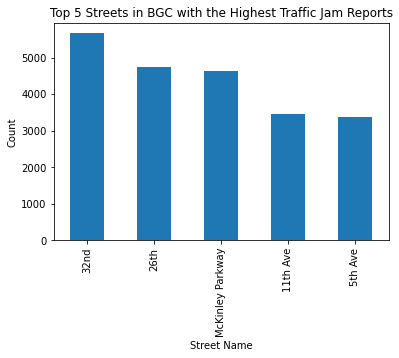

In [263]:
#Display Top 10 Streets in BGC with the Highest Traffic Jam Reports 
ax = df['street'].value_counts() \
    .head(5) \
    .plot(kind='bar', title='Top 5 Streets in BGC with the Highest Traffic Jam Reports')
ax.set_xlabel('Street Name') 
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

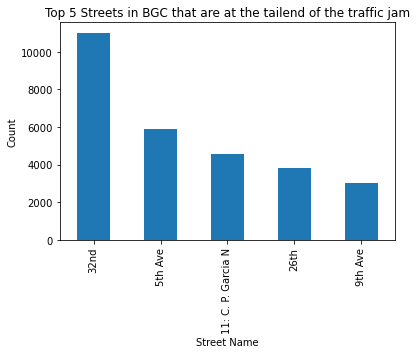

In [264]:
ax = df['endNode'].value_counts() \
    .head(5) \
    .plot(kind='bar', title='Top 5 Streets in BGC that are at the tailend of the traffic jam')
ax.set_xlabel('Street Name') 
ax.set_ylabel('Count')

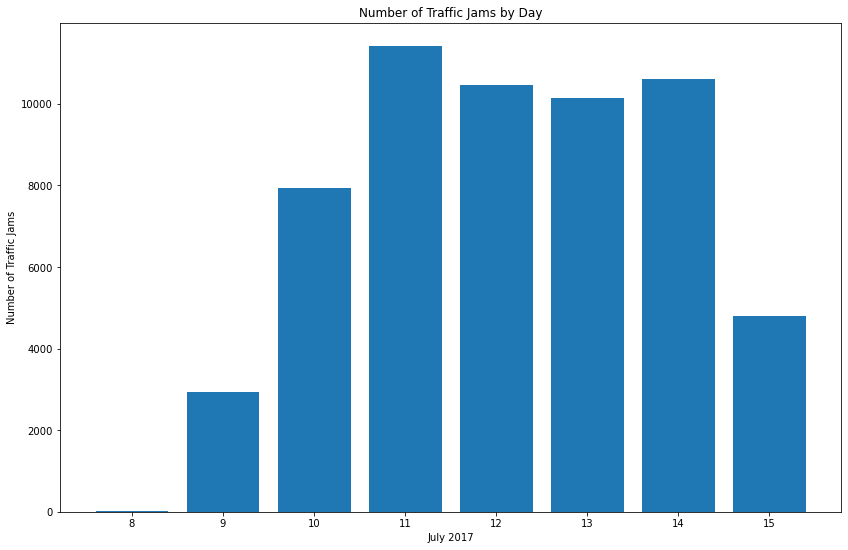

In [257]:
# create a new Day column
df['Day'] = df.index.day

# group data by Hour and count the number of alerts in each hour
hourly_counts = df.groupby('Day')['level'].count()

# plot the data using a bar chart
plt.figure(figsize=(14,9))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Number of Traffic Jams by Day')
plt.xlabel('July 2017')
plt.ylabel('Number of Traffic Jams')
plt.show()

#July 8, 2017	 Saturday
#July 9, 2017	 Sunday
#July 10, 2017	 Monday
#July 11, 2017	 Tuesday
#July 12, 2017	 Wednesday
#July 13, 2017	 Thursday
#July 14, 2017	 Friday
#July 15, 2017	 Saturday

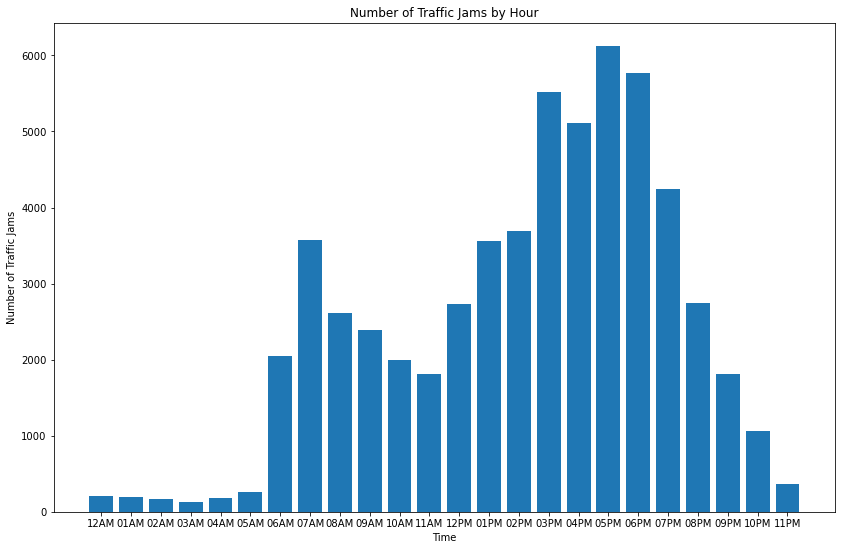

In [258]:
# create a new Hour column
df['Hour'] = df.index.hour

# group data by Hour and count the number of alerts in each hour
hourly_counts = df.groupby('Hour')['level'].count()

# create a list of datetime objects for each hour of the day
hour_labels = [datetime.time(hour=h).strftime('%I%p') for h in range(24)]

# plot the data using a bar chart
plt.figure(figsize=(14,9))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Number of Traffic Jams by Hour')
plt.xlabel('Time')
plt.ylabel('Number of Traffic Jams')
plt.xticks(hourly_counts.index, hour_labels)
plt.show()

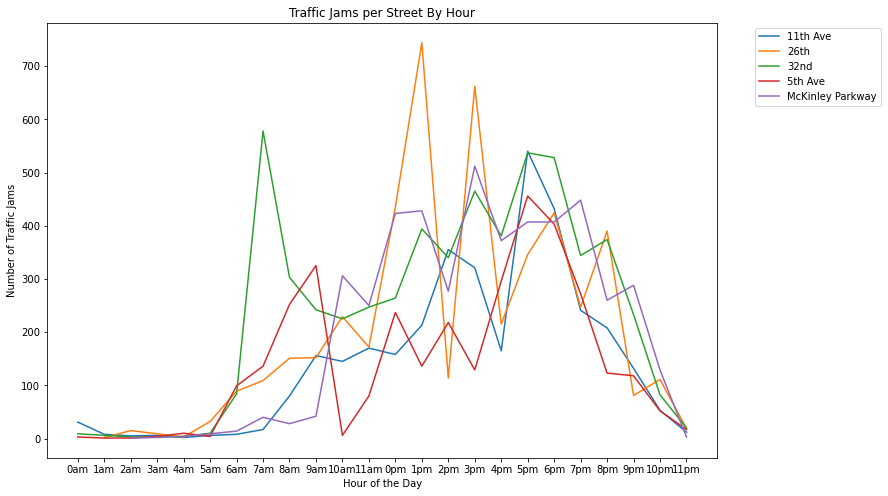

In [265]:
# group data by street and hour and count the number of incidents in each hour
hourly_counts = df_top_5.groupby(['street', df_top_5.index.hour])['level'].count()

# create a line graph with the number of traffic incidents on the y-axis and hour of the day on the x-axis, using the street name as the data point labels
fig, ax = plt.subplots(figsize=(12, 8))
for street in hourly_counts.index.levels[0]:
    x = hourly_counts[street].index.values
    y = hourly_counts[street].values
    ax.plot(x, y, label=street)

# format the x-axis labels to display hours in the format "1pm", "2pm", etc.
ax.set_xticks(range(24))
ax.set_xticklabels([f"{hour%12}{'pm' if hour>=12 else 'am'}" for hour in range(24)])

# set the axis labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Traffic Jams')
ax.set_title('Traffic Jams per Street By Hour')

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()

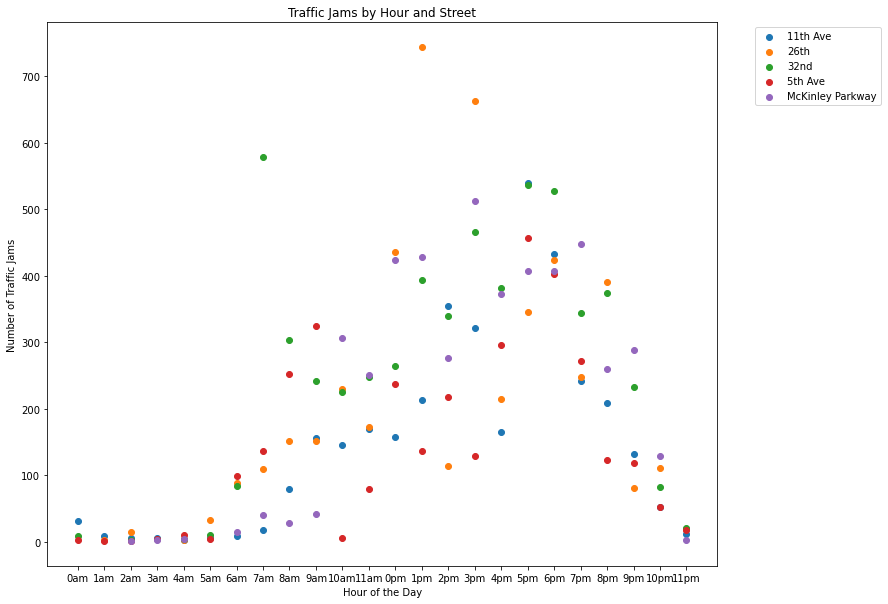

In [260]:
# get the top 5 streets by number of incidents
top_5_streets = df['street'].value_counts().head(5).index.tolist()

# filter the dataframe to only include incidents from the top 5 streets
df_top_5 = df[df['street'].isin(top_5_streets)]

# group data by street and hour and count the number of incidents in each hour
hourly_counts = df_top_5.groupby(['street', df_top_5.index.hour])['level'].count()

# create a scatterplot with the number of traffic incidents on the y-axis and hour of the day on the x-axis, using the street name as the data point labels
fig, ax = plt.subplots(figsize=(12, 10))
for street in hourly_counts.index.levels[0]:
    x = hourly_counts[street].index.values
    y = hourly_counts[street].values
    ax.scatter(x, y, label=street)

# format the x-axis labels to display hours in the format "1pm", "2pm", etc.
ax.set_xticks(range(24))
ax.set_xticklabels([f"{hour%12}{'pm' if hour>=12 else 'am'}" for hour in range(24)])

# set the axis labels and title
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Traffic Jams')
ax.set_title('Traffic Jams by Hour and Street')

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()

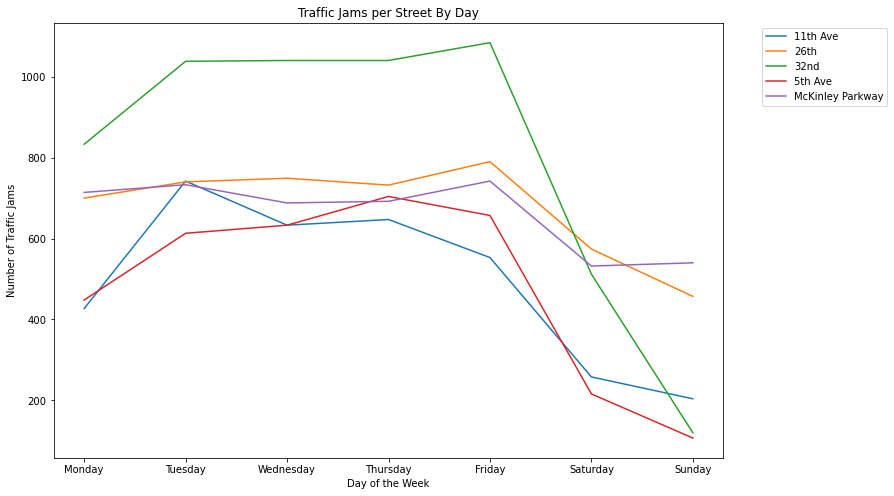

In [268]:
# group data by street and day of the week and count the number of incidents in each day
daily_counts = df_top_5.groupby(['street', df_top_5.index.dayofweek])['level'].count()

# create a line graph with the number of traffic incidents on the y-axis and day of the week on the x-axis, using the street name as the data point labels
fig, ax = plt.subplots(figsize=(12, 8))
for street in daily_counts.index.levels[0]:
    x = daily_counts[street].index.values
    y = daily_counts[street].values
    ax.plot(x, y, label=street)

# format the x-axis labels to display days of the week
ax.set_xticks(range(7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# set the axis labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Traffic Jams')
ax.set_title('Traffic Jams per Street By Day')

# place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show()